In [1]:
from utils import *

In [2]:
velocities = {
    -1.9: [539481, 565638, 565653],
    -1.5: [539480, 565640, 565654],
    -1.1: [539468, 565641, 565655],
    -0.9: [539461, 565642, 565656],
    -0.5: [539460, 565643, 565657],
    -0.1: [539427, 565644, 565658],
    0.1: [536383, 565645, 565660],
    0.5: [536384, 565646, 565661],
    0.9: [536385, 565647, 565662],
    1.1: [536386, 565648, 565663],
    1.5: [536387, 565649, 565664],
    1.9: [536388, 565652, 565665],
}

In [4]:
remotepaths ={vel: {job: f"/tiger/u/lando/cmeta/v{vel}/{job}/log.json" for job in jobs} for (vel, jobs) in velocities.items()}
localpaths ={vel: {job: f"/tmp/log{job}.json" for job in jobs} for (vel, jobs) in velocities.items()}

In [ ]:
# buffer
reload = False

In [ ]:
import os
if reload:
    for vel in velocities:
        for job in velocities[vel]:
            remote = remotepaths[vel][job]
            local = localpaths[vel][job]
            command = f"scp lando@sc.stanford.edu:{remote} {local}"
            rcode = os.system(command)
            if rcode != 0:
                print(command)
                raise Exception("Bad Status code")
            print(f"Velocity = {vel}, Loaded Job {job}")

In [5]:
lines = {vel: {job: read_log(localpaths[vel][job]) for job in jobs} for (vel, jobs) in velocities.items()}

In [6]:
warms = {vel: {} for vel in velocities}
slbos = {vel: {} for vel in velocities}

for vel in velocities:
    for job in velocities[vel]:
        warm, slbo = extract_rewards(lines[vel][job])
        warms[vel][job] = warm
        slbos[vel][job] = slbo
        print(f"Velocity {vel}, Job {job} has started {len(slbos[vel][job][0])} stages")

Velocity -1.9, Job 539481 has started 100 stages
Velocity -1.9, Job 565638 has started 67 stages
Velocity -1.9, Job 565653 has started 68 stages
Velocity -1.5, Job 539480 has started 100 stages
Velocity -1.5, Job 565640 has started 68 stages
Velocity -1.5, Job 565654 has started 68 stages
Velocity -1.1, Job 539468 has started 100 stages
Velocity -1.1, Job 565641 has started 70 stages
Velocity -1.1, Job 565655 has started 68 stages
Velocity -0.9, Job 539461 has started 100 stages
Velocity -0.9, Job 565642 has started 69 stages
Velocity -0.9, Job 565656 has started 67 stages
Velocity -0.5, Job 539460 has started 100 stages
Velocity -0.5, Job 565643 has started 66 stages
Velocity -0.5, Job 565657 has started 69 stages
Velocity -0.1, Job 539427 has started 100 stages
Velocity -0.1, Job 565644 has started 68 stages
Velocity -0.1, Job 565658 has started 69 stages
Velocity 0.1, Job 536383 has started 100 stages
Velocity 0.1, Job 565645 has started 69 stages
Velocity 0.1, Job 565660 has starte

In [7]:
real_warms, virt_warms = {vel: {} for vel in velocities}, {vel: {} for vel in velocities}

for vel in velocities:
    for job in velocities[vel]:
        rw, vr = get_warmup(lines[vel][job])
        real_warms[vel][job] = rw
        virt_warms[vel][job] = vr
        print(f"Velocity {vel} Job {job} has {len(real_warms[vel][job])} warmup iters")

Velocity -1.9 Job 539481 has 79 warmup iters
Velocity -1.9 Job 565638 has 79 warmup iters
Velocity -1.9 Job 565653 has 79 warmup iters
Velocity -1.5 Job 539480 has 79 warmup iters
Velocity -1.5 Job 565640 has 79 warmup iters
Velocity -1.5 Job 565654 has 79 warmup iters
Velocity -1.1 Job 539468 has 79 warmup iters
Velocity -1.1 Job 565641 has 79 warmup iters
Velocity -1.1 Job 565655 has 79 warmup iters
Velocity -0.9 Job 539461 has 79 warmup iters
Velocity -0.9 Job 565642 has 79 warmup iters
Velocity -0.9 Job 565656 has 79 warmup iters
Velocity -0.5 Job 539460 has 79 warmup iters
Velocity -0.5 Job 565643 has 79 warmup iters
Velocity -0.5 Job 565657 has 79 warmup iters
Velocity -0.1 Job 539427 has 79 warmup iters
Velocity -0.1 Job 565644 has 79 warmup iters
Velocity -0.1 Job 565658 has 79 warmup iters
Velocity 0.1 Job 536383 has 79 warmup iters
Velocity 0.1 Job 565645 has 79 warmup iters
Velocity 0.1 Job 565660 has 79 warmup iters
Velocity 0.5 Job 536384 has 79 warmup iters
Velocity 0.5 J

In [8]:
real_rewards = {vel: {} for vel in velocities}
virt_rewards = {vel: {} for vel in velocities}

for vel in velocities:
    for job in velocities[vel]:
        real, virt = get_checkpoints(lines[vel][job])
        real_rewards[vel][job] = real
        virt_rewards[vel][job] = virt

In [9]:
mins = {
    0.1: -233.78927811594411, 
    0.5: -411.35567527732564, 
    0.9: -610.8872788980733, 
    1.1: -710.8872788980734, 
    1.5: -910.8872788980736, 
    1.9: -1110.8872788980734,
}
maxs = {
    0.1: -3.5636334132798204, 
    0.5: -10.710668525449655, 
    0.9: -30.98072317031702, 
    1.1: -44.14465103596886, 
    1.5: -51.02850590038164, 
    1.9: -61.263854017466976
}

avgs = {
     0.1: -10.202044447173503, 
    0.5: -21.142860320736776, 
    0.9: -46.16668517147687, 
    1.1: -66.24972224328671, 
    1.5: -87.42144407053759, 
    1.9: -113.32796903390458, 
    2.0: -137.50432902203622,
}


#### AVERAGED 

maxs = {-2.0: -90.60565689208266, -1.9: -70.67690735370886, -1.5: -42.06956291427862, -1.1: -36.99489419364075, -1.0: -23.743657058369845, -0.9: -21.157800214277188, -0.1: -3.1041742201174394, -0.5: -10.680755730823584, 0.1: -3.4021209446496337, 0.5: -12.323942266246538, 0.9: -23.53198112703673, 1.1: -31.343789461165542, 1.5: -51.21932985927324, 1.9: -63.050301977318384, 2.0: -85.4236675900036}
mins = {-2.0: -993.9190119522864, -1.9: -945.0818382085795, -1.5: -745.0818382085795, -1.1: -546.2446644648728, -1.0: -510.61478664909976, -0.9: -445.43216946165614, -0.1: -187.5039532110764, -0.5: -259.65397607613966, 0.1: -231.2243621688237, 0.5: -410.1003669467948, 0.9: -609.6475634930734, 1.1: -709.6475634930736, 1.5: -909.6475634930736, 1.9: -1109.6475634930734, 2.0: -1160.8872788980732}
avgs = {-2.0: -136.4502250988098, -1.9: -101.15423269038038, -1.5: -73.20949096123613, -1.1: -61.13370977385761, -1.0: -47.087996715423955, -0.9: -35.88038558730979, -0.1: -8.75671650336899, -0.5: -18.677280704086265, 0.1: -9.545282672321349, 0.5: -23.09364493886916, 0.9: -40.610557419984794, 1.1: -50.763872744894364, 1.5: -81.94783046596359, 1.9: -105.55608759237818, 2.0: -137.50432902203622}


In [14]:
def plot_all_vel_warmups(vel):
    for job in velocities[vel]:
        fig, ax = plt.subplots(figsize=(15, 5))

        plot_stage(ax, warms[vel][job][0], 80, 40)
        warm_iters = len(real_warms[vel][job])

        ax.scatter([(i+1)*40 for i in range(0, warm_iters)], real_warms[vel][job], color="r")
        ax.scatter([(i+1)*40 for i in range(0, warm_iters)], virt_warms[vel][job], color="y")
        ax.set_title(f"v{vel} Warmup 80 Iters of SLBO")
        ax.axhline(y=mins[vel], color="yellow", label="min")
        ax.axhline(y=maxs[vel], color="orange", label="max")
        ax.axhline(y=avgs[vel], color="green", label="avg")
        ax.set_ylim((-300, 0))
        ax.legend()

In [15]:
seeds = [100, 101, 102]
def task_from_lines(lines):
    for line in lines:
        if "Task Fixed" not in line["fmt"]:
            continue
            
        return line["args"][0]["goal_velocity"]

for vel in velocities:
    for job in velocities[vel]:
        #print(f"{task_from_lines(lines[vel][job])} == {vel}")
        assert task_from_lines(lines[vel][job]) == vel

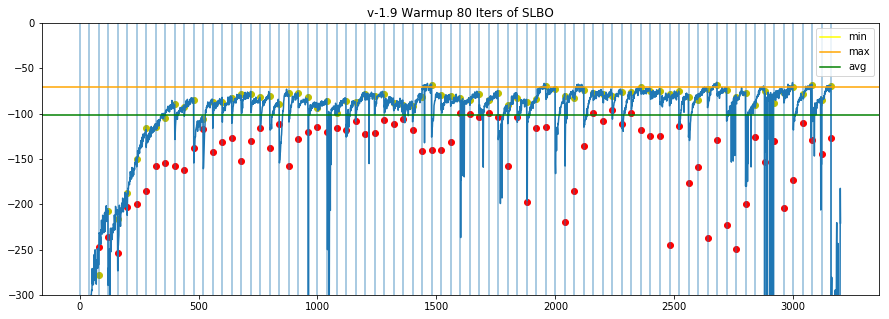

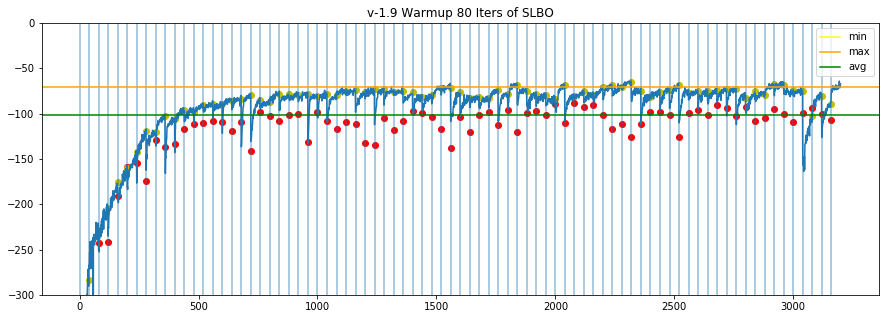

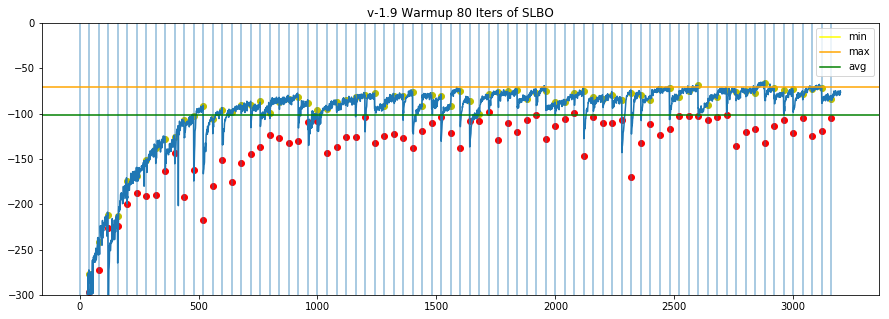

In [50]:
plot_all_vel_warmups(-1.9)

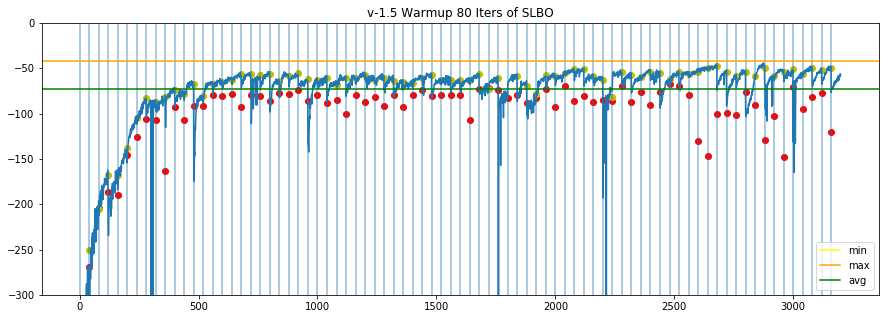

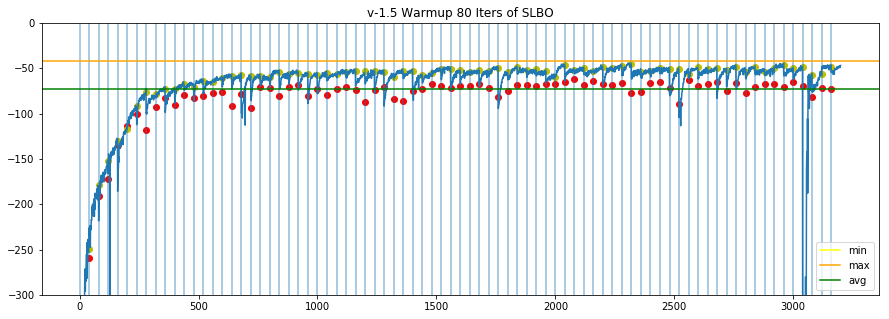

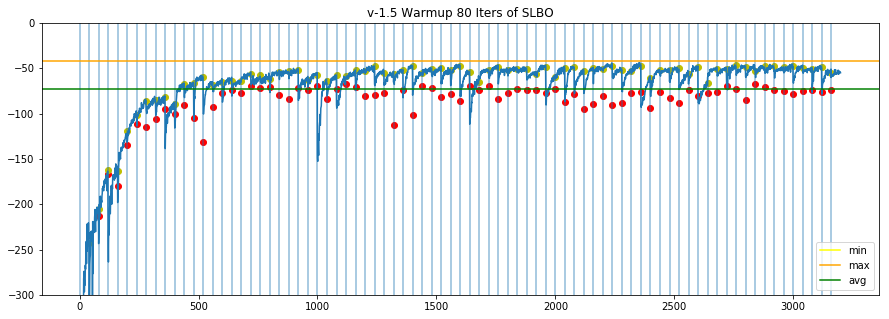

In [51]:
plot_all_vel_warmups(-1.5)

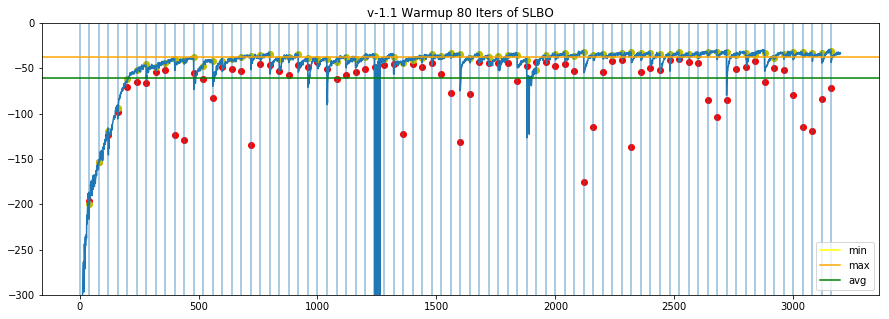

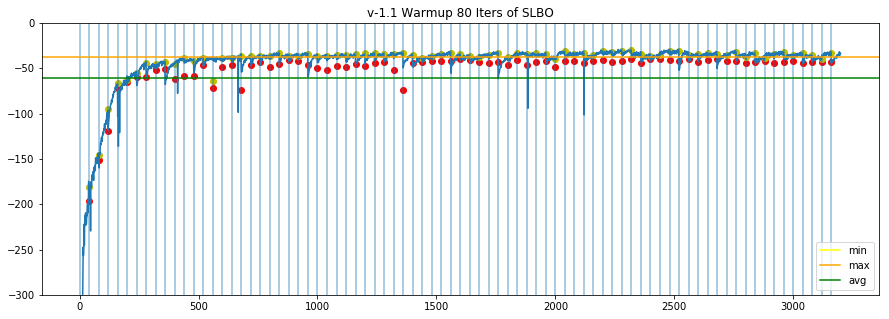

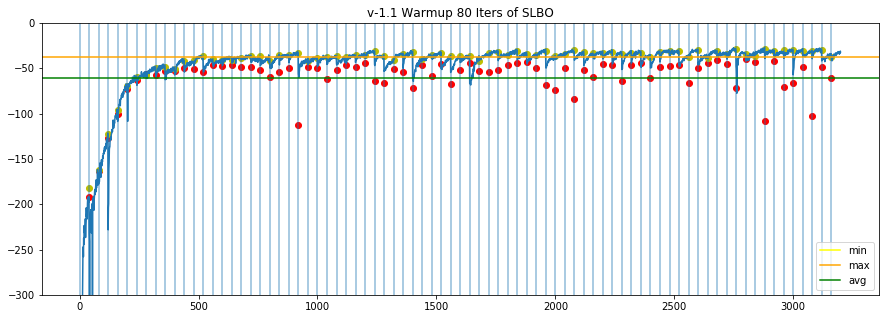

In [52]:
plot_all_vel_warmups(-1.1)

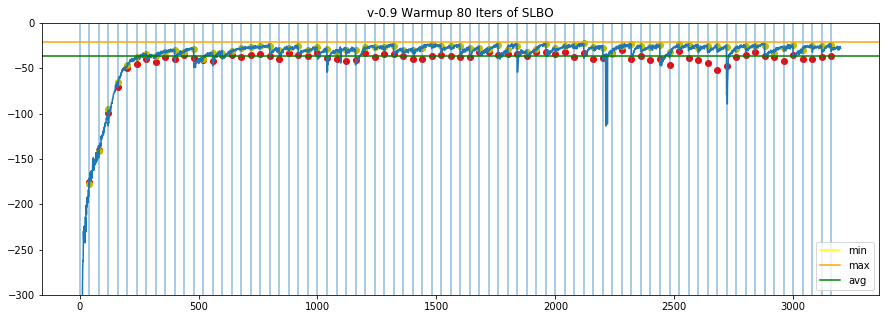

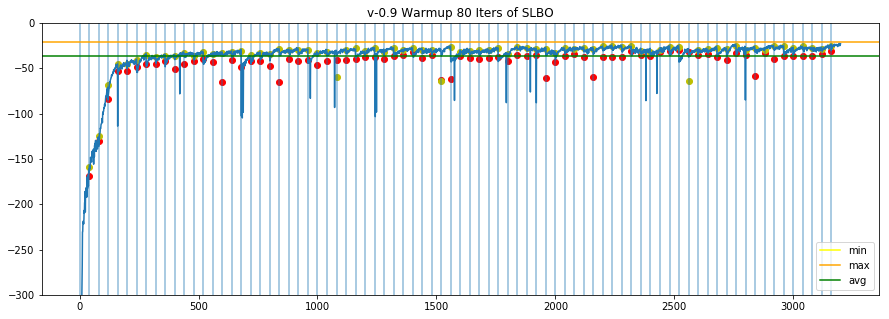

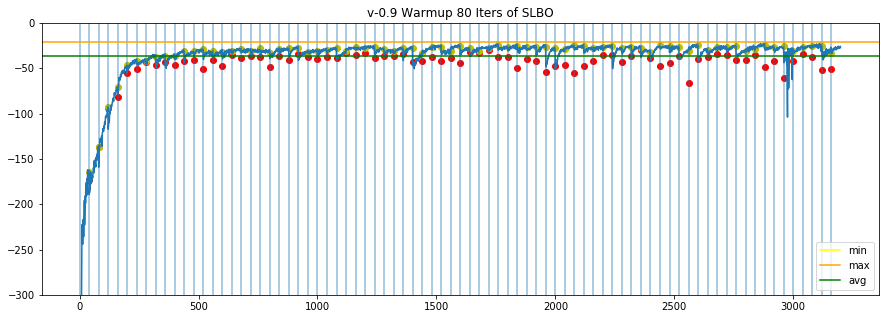

In [53]:
plot_all_vel_warmups(-0.9)

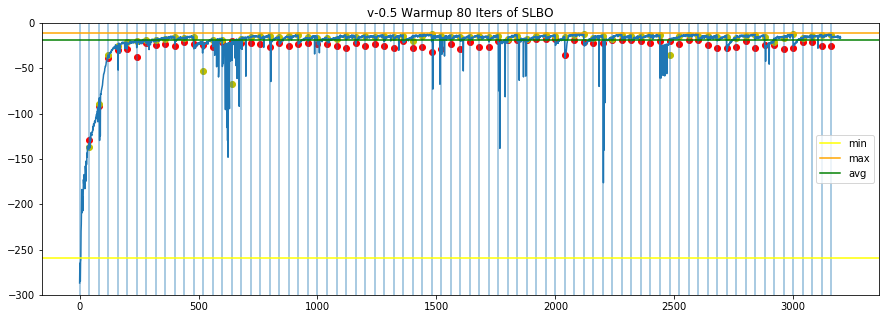

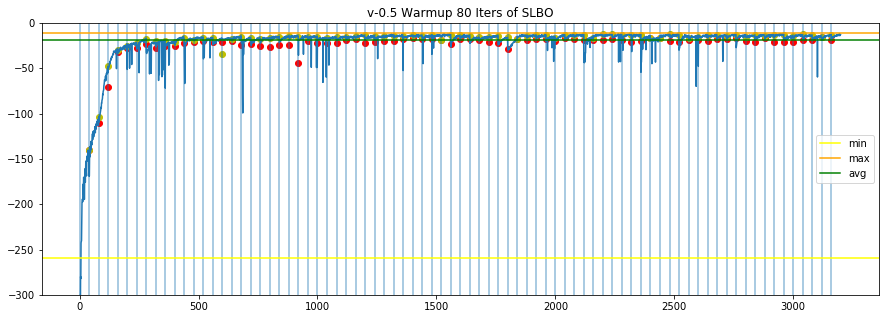

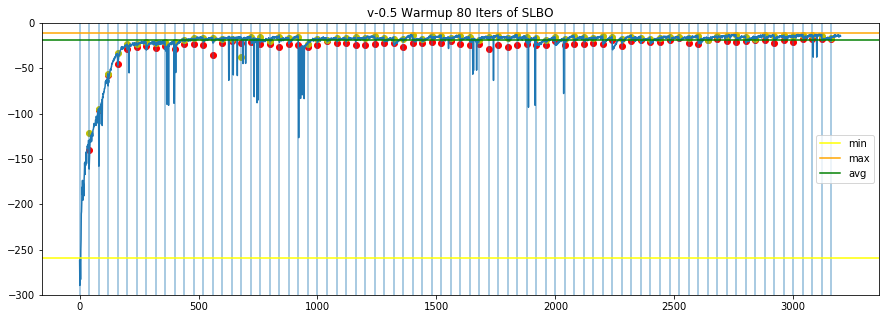

In [54]:
plot_all_vel_warmups(-0.5)

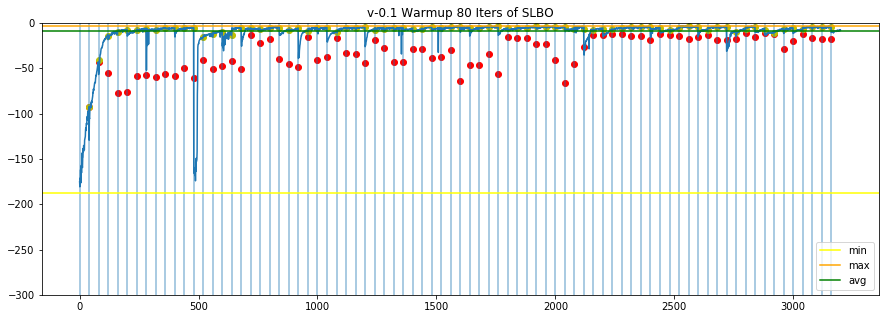

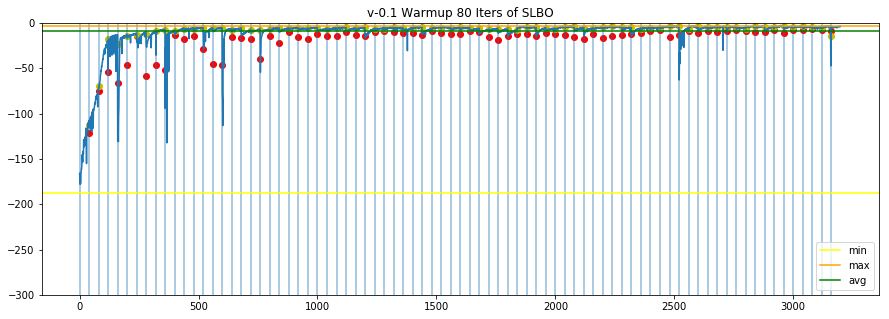

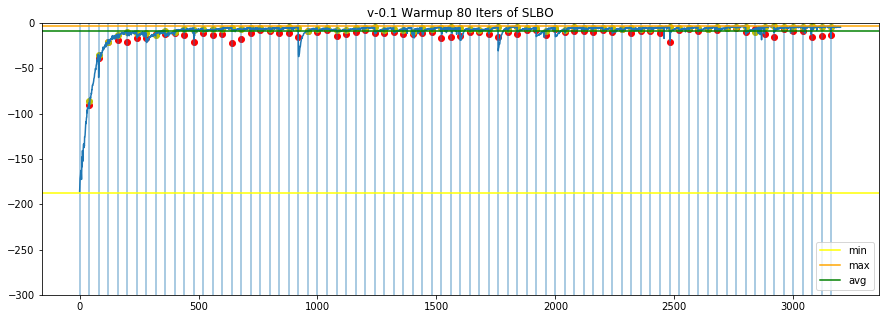

In [55]:
plot_all_vel_warmups(-0.1)

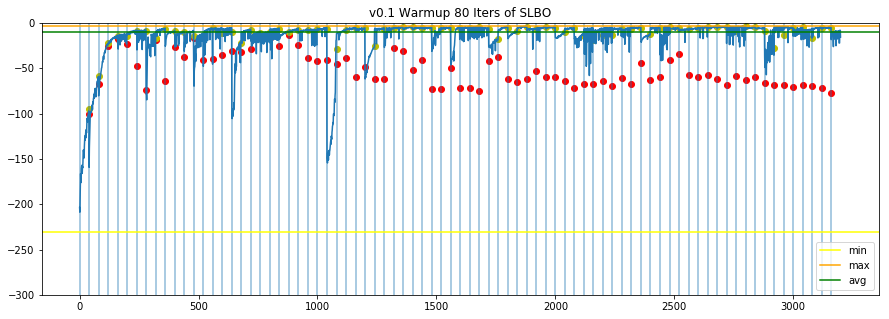

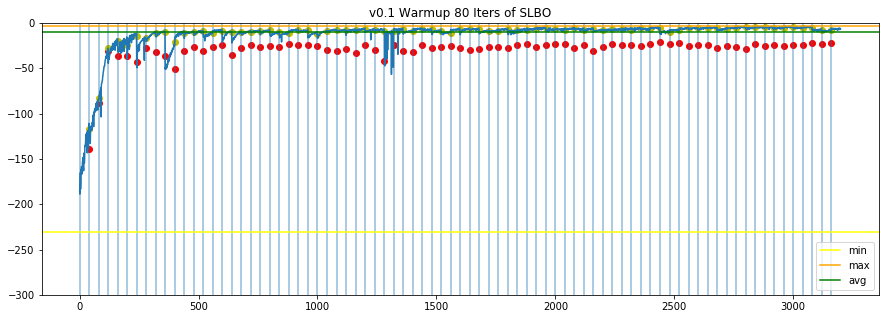

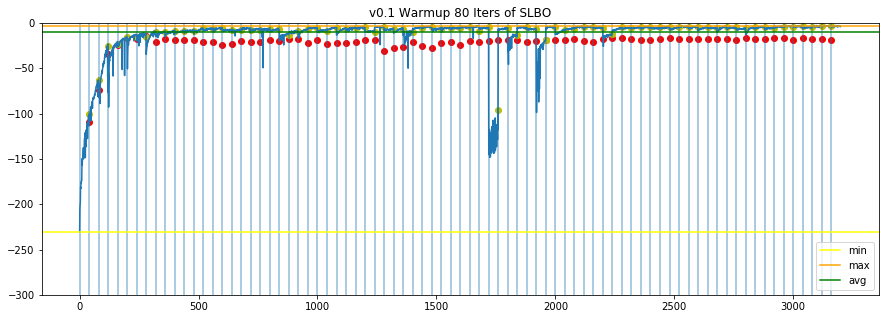

In [56]:
plot_all_vel_warmups(0.1)

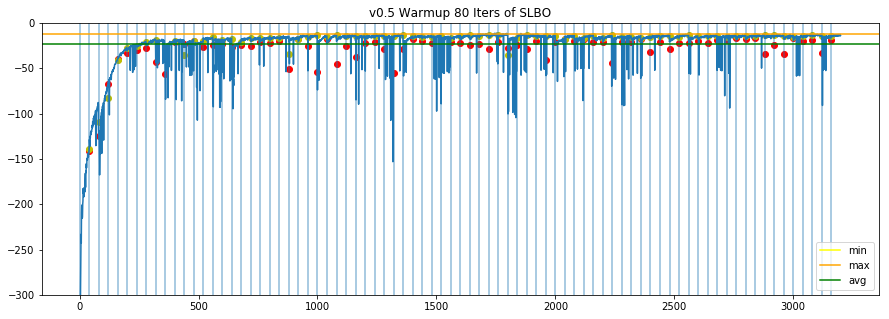

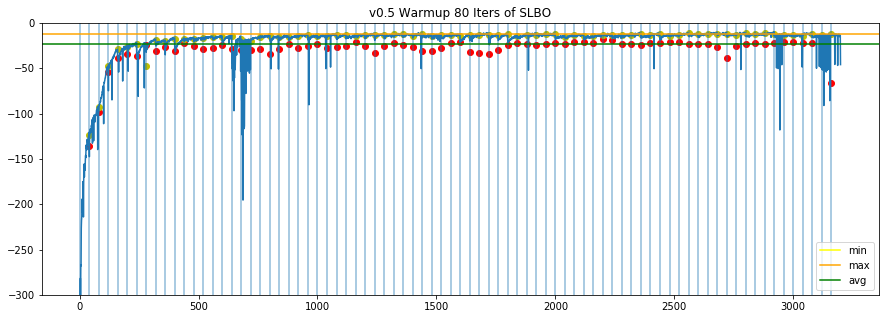

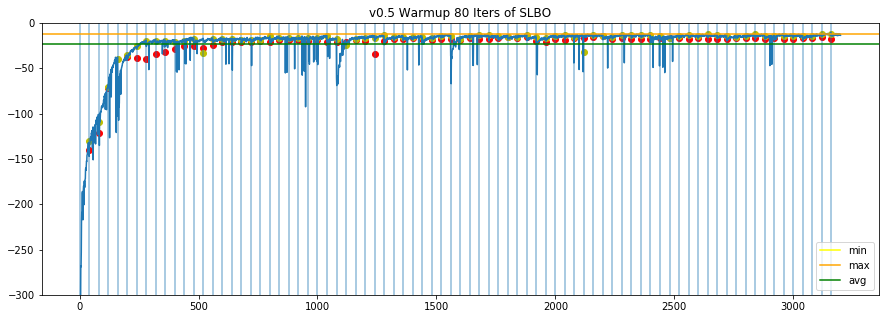

In [57]:
plot_all_vel_warmups(0.5)

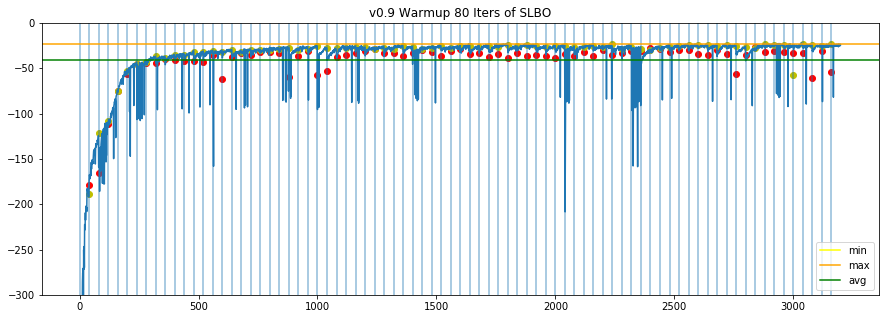

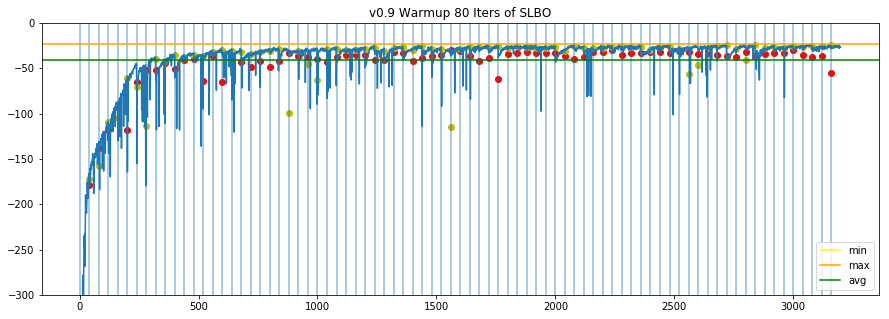

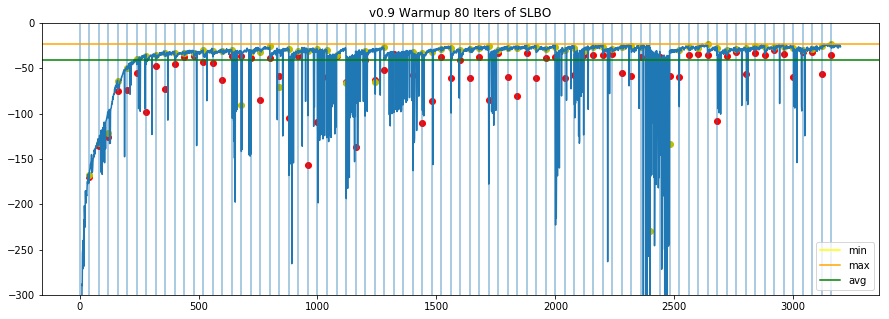

In [58]:
plot_all_vel_warmups(0.9)

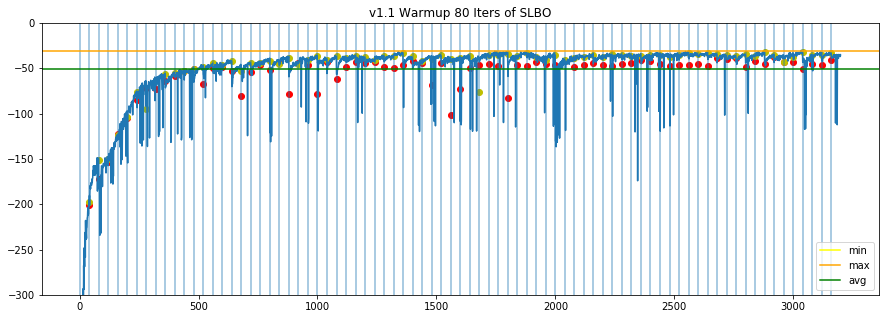

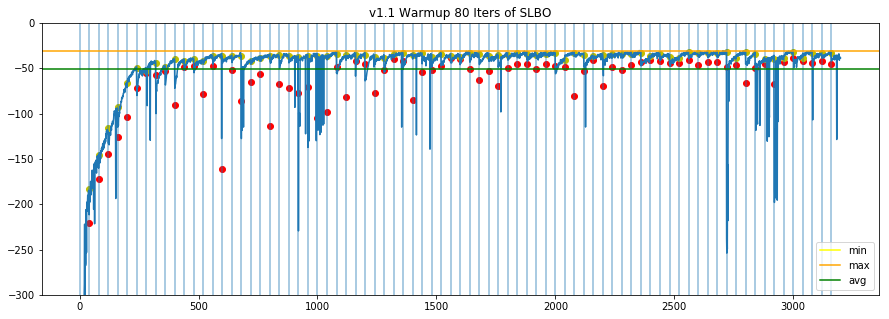

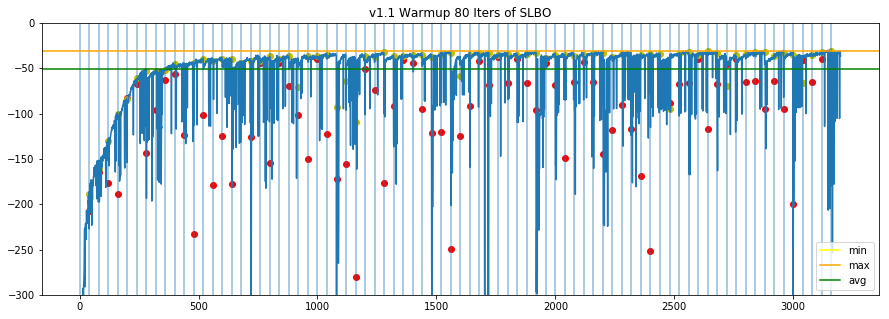

In [59]:
plot_all_vel_warmups(1.1)

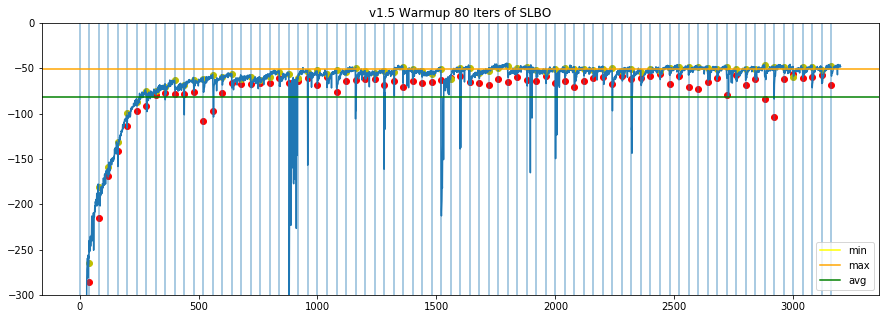

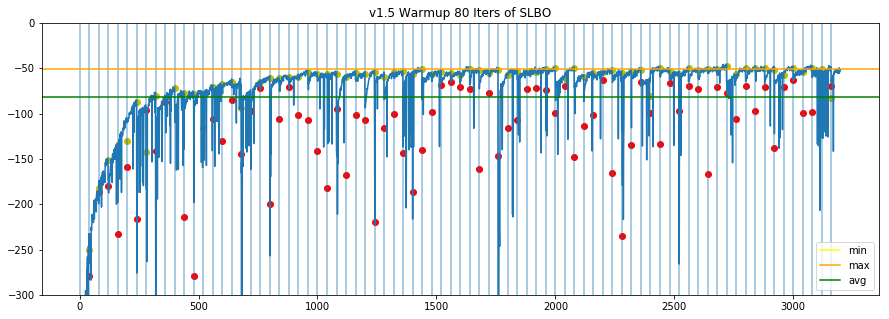

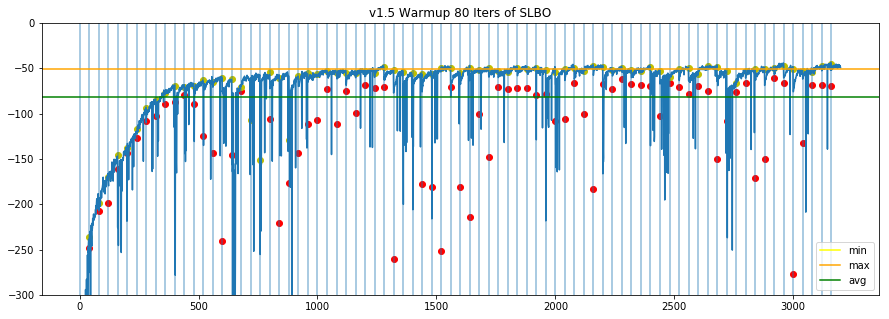

In [60]:
plot_all_vel_warmups(1.5)

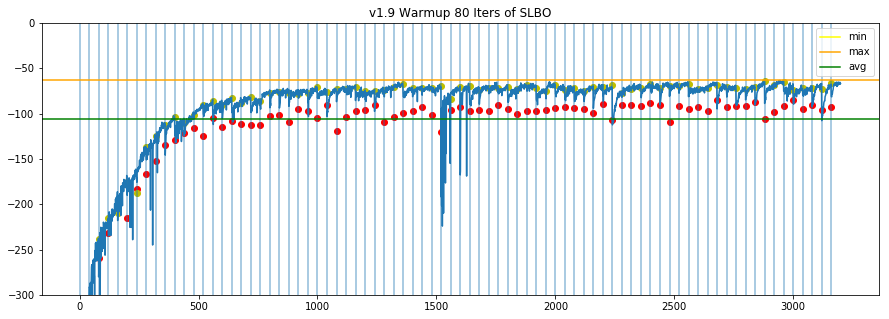

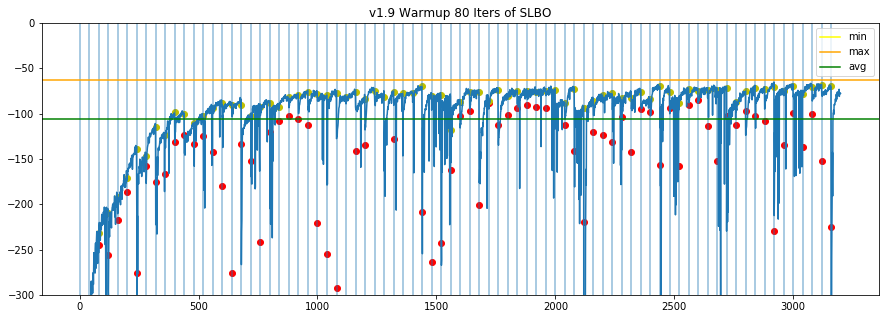

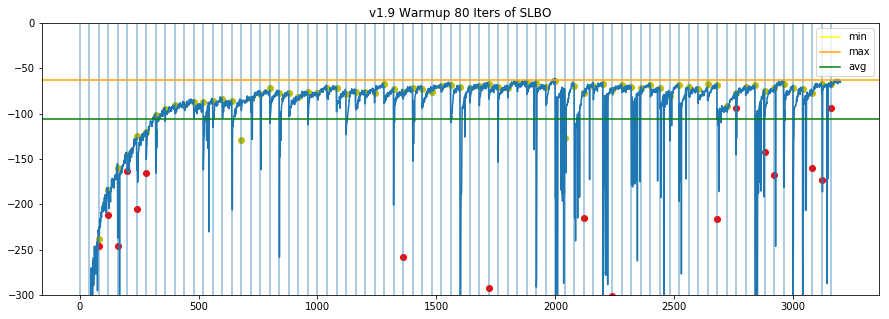

In [16]:
plot_all_vel_warmups(1.9)

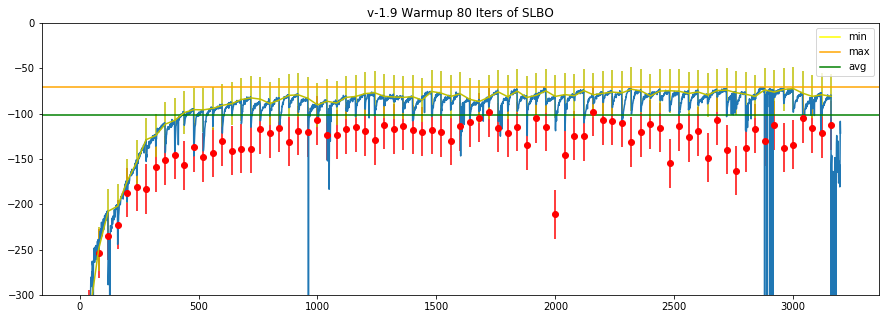

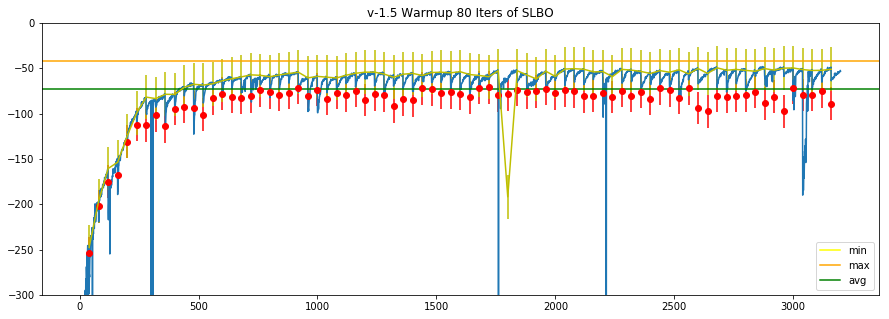

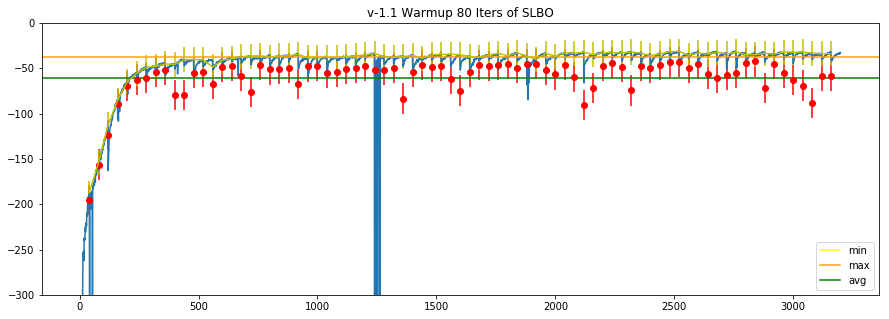

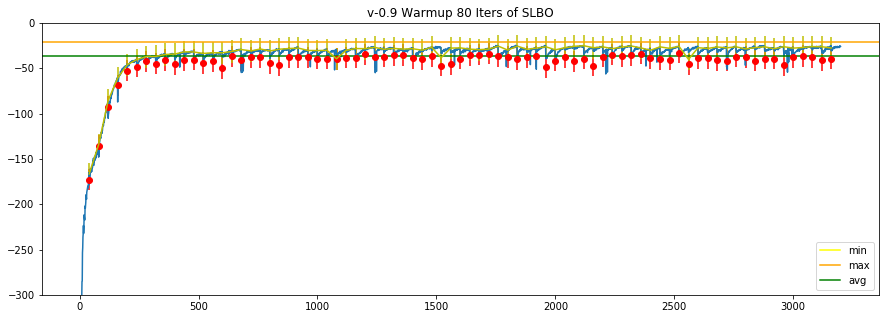

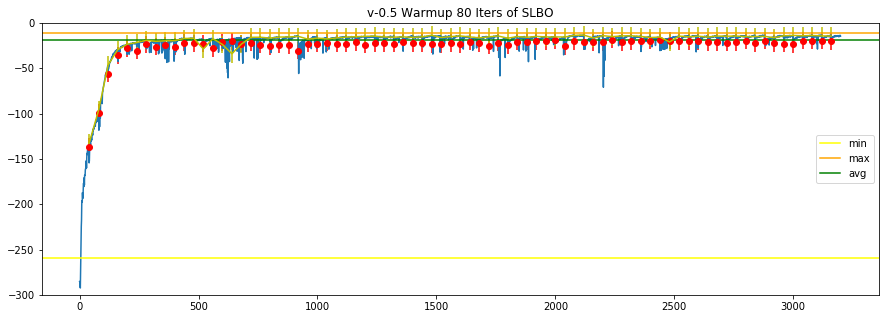

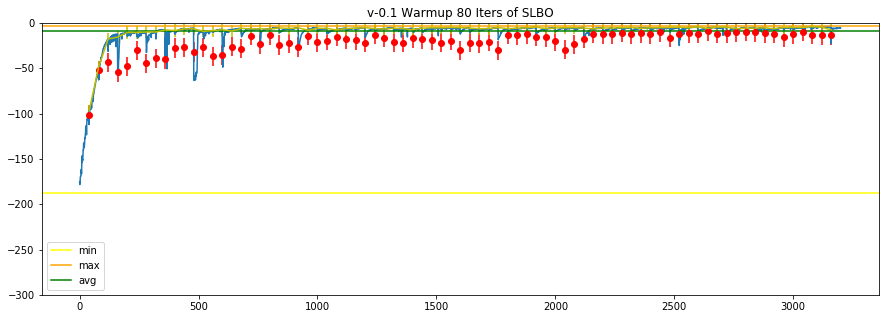

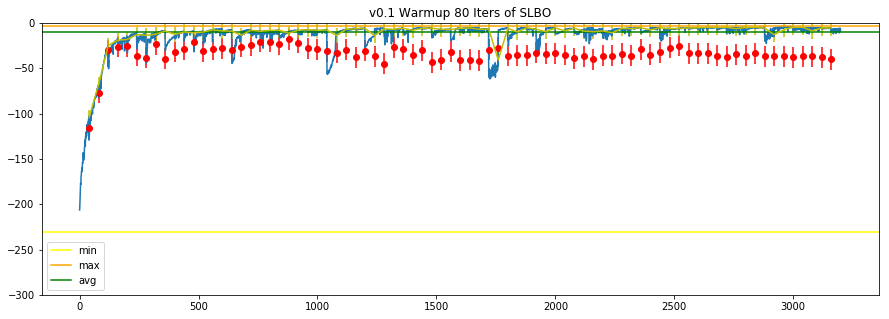

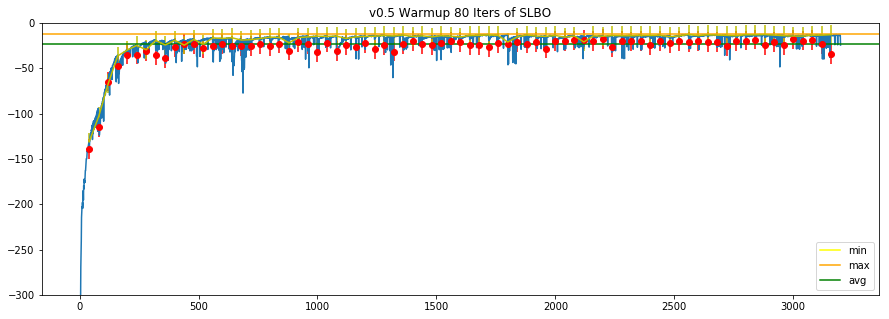

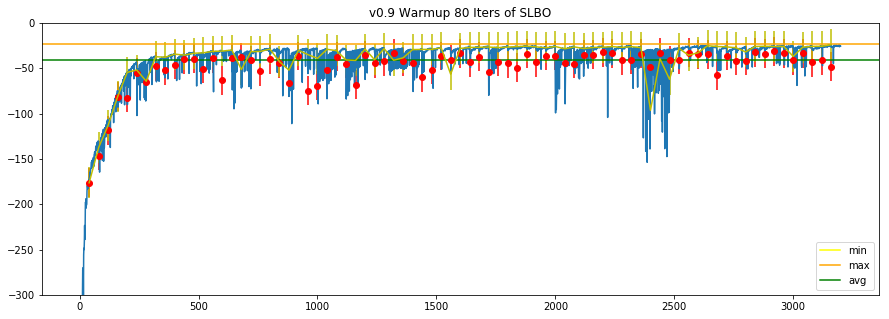

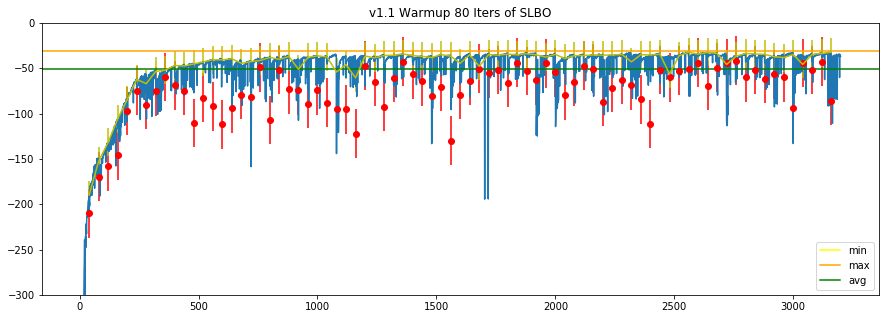

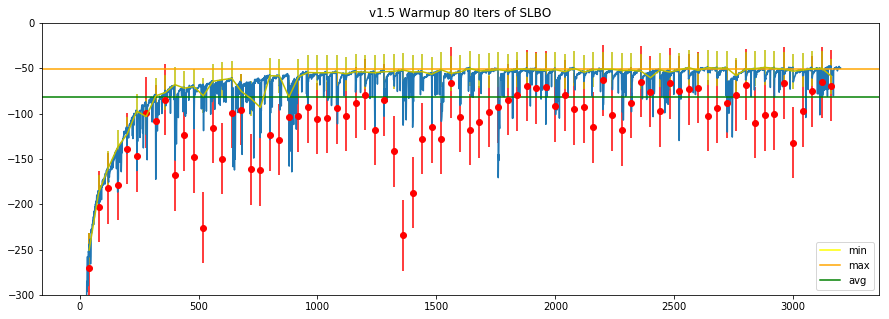

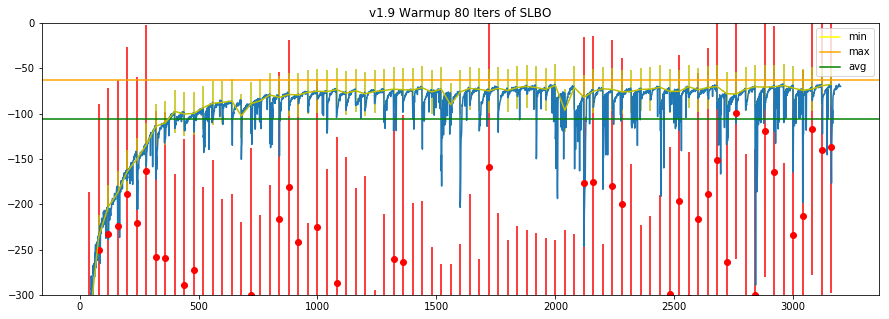

In [12]:
for vel in velocities:
    fig, ax = plt.subplots(figsize=(15, 5))
    
    plot_stage(ax, np.mean(np.vstack([warms[vel][job][0] for job in velocities[vel]]), axis=0), 80, 40, iterlines=False)
    warm_iters = min([len(real_warms[vel][job]) for job in velocities[vel]])
    
    njobs = len(velocities[vel])
                          
    ax.errorbar(
        [(i+1)*40 for i in range(0, warm_iters)], 
        np.mean(np.vstack([real_warms[vel][job] for job in velocities[vel]]), axis=0), 
        np.std(np.vstack([real_warms[vel][job] for job in velocities[vel]])) / np.sqrt(njobs),
        color="r",
        fmt='o',
    )
    ax.errorbar(
        [(i+1)*40 for i in range(0, warm_iters)], 
        np.mean(np.vstack([virt_warms[vel][job] for job in velocities[vel]]), axis=0),
        np.std(np.vstack([virt_warms[vel][job] for job in velocities[vel]])) / np.sqrt(njobs),
        color="y",
    )
    ax.set_title(f"v{vel} Warmup 80 Iters of SLBO")
    ax.axhline(y=mins[vel], color="yellow", label="min")
    ax.axhline(y=maxs[vel], color="orange", label="max")
    ax.axhline(y=avgs[vel], color="green", label="avg")
    ax.set_ylim((-300, 0))
    ax.legend()

In [26]:
final_diffs = {vel: {} for vel in velocities}
avg_virt_diffs = {vel: {} for vel in velocities}

for vel in velocities:
    for job in velocities[vel]:
        final_diffs[vel][job] = virt_warms[vel][job][-1] - real_warms[vel][job][-1]
        avg_virt_diffs[vel][job] = np.mean([
            virt_warms[vel][job][i] - virt_warms[vel][job][i-1] 
            for i in range(len(virt_warms[vel][job]) -1)
        ])

Text(0, 0.5, 'gap')

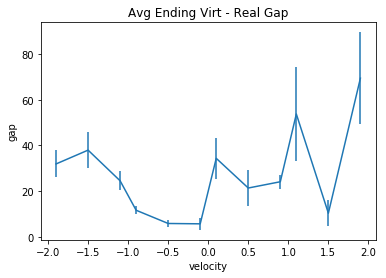

In [29]:
plt.errorbar(
    [vel for vel in velocities],
    [np.mean([final_diffs[vel][job] for job in velocities[vel]]) for vel in velocities],
    [np.std([final_diffs[vel][job] for job in velocities[vel]]) / len(final_diffs[vel]) for vel in velocities],
)
plt.title("Avg Ending Virt - Real Gap")
plt.xlabel("velocity")
plt.ylabel("gap")

Text(0, 0.5, 'gap')

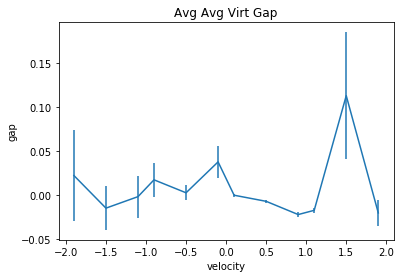

In [28]:
plt.errorbar(
    [vel for vel in velocities],
    [np.mean([avg_virt_diffs[vel][job] for job in velocities[vel]]) for vel in velocities],
    [np.std([avg_virt_diffs[vel][job] for job in velocities[vel]]) / len(avg_virt_diffs[vel]) for vel in velocities],
)
plt.title("Avg Avg Virt Gap")
plt.xlabel("velocity")
plt.ylabel("gap")

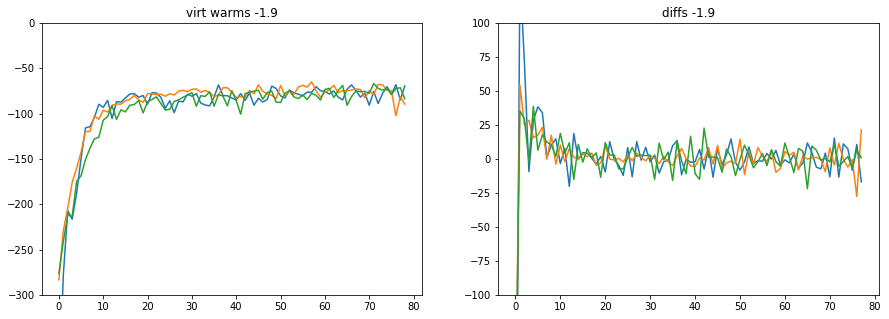

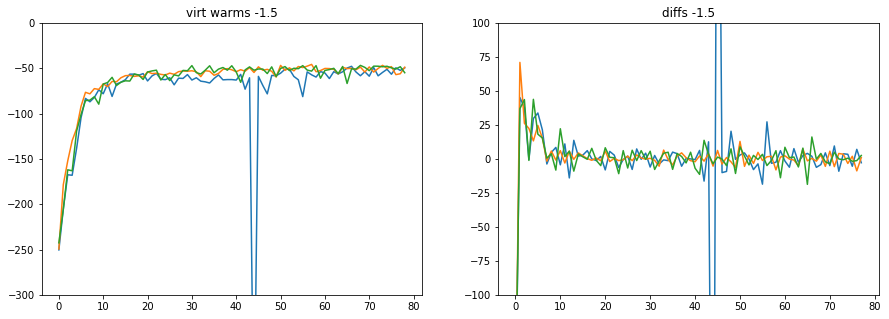

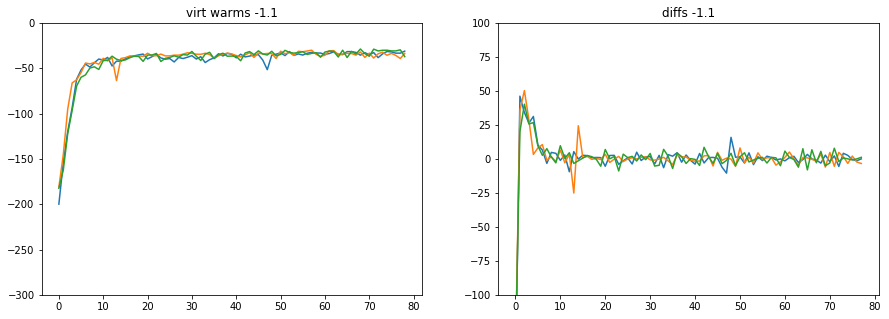

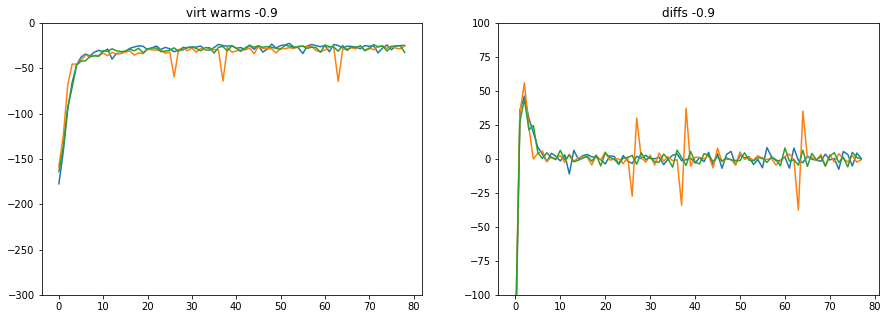

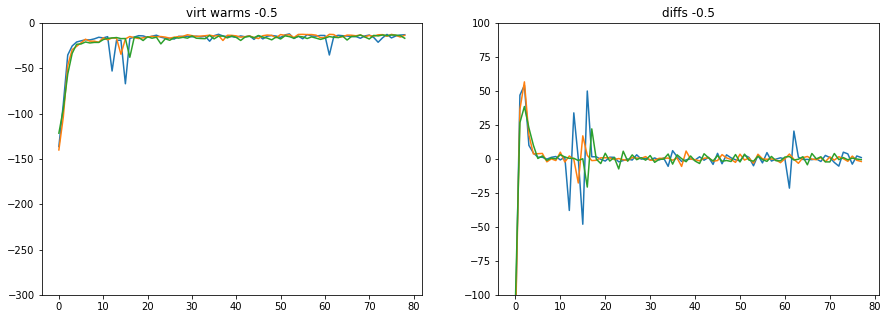

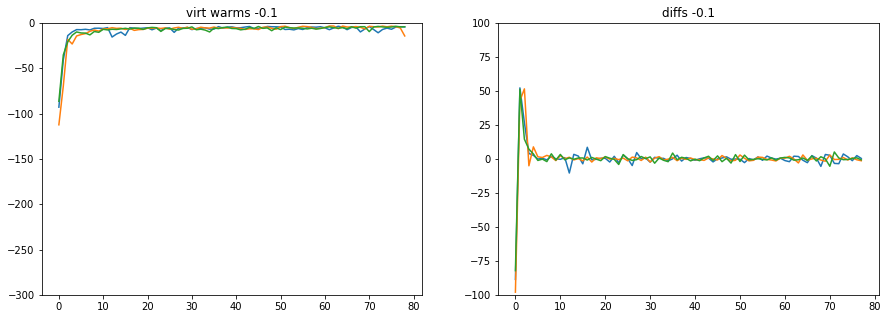

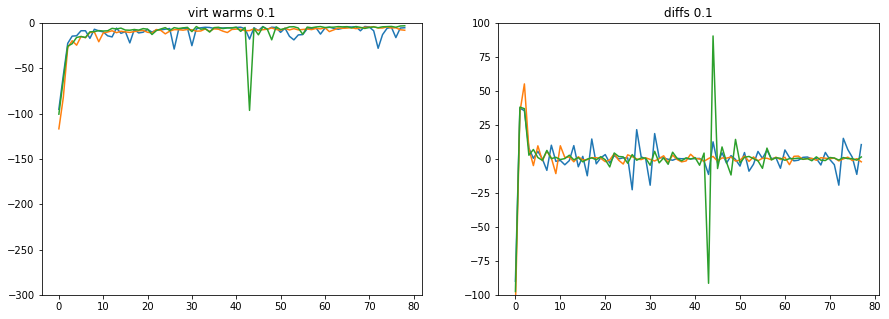

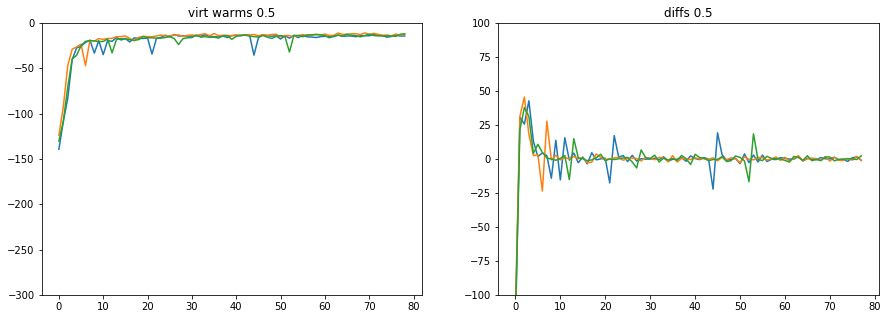

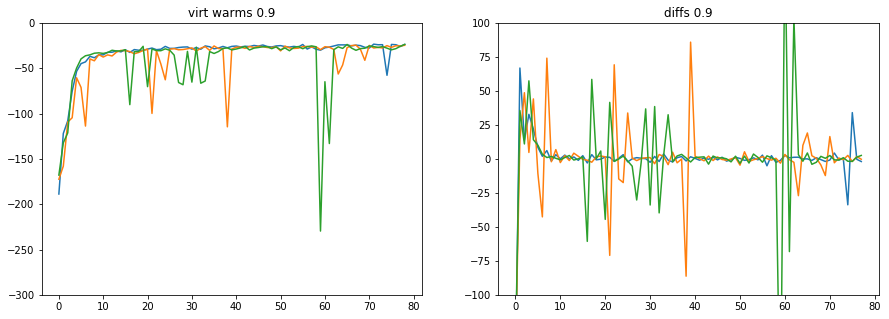

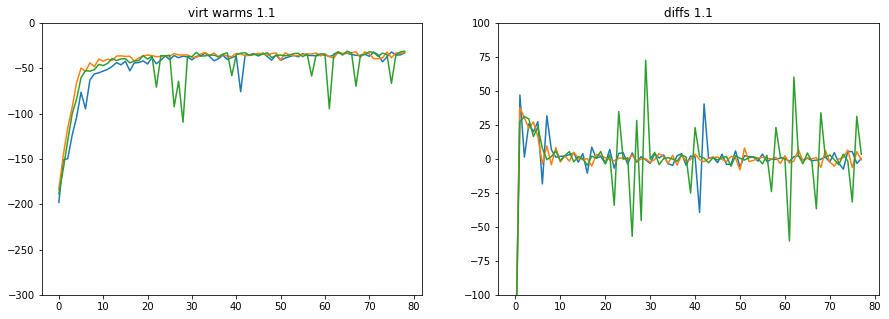

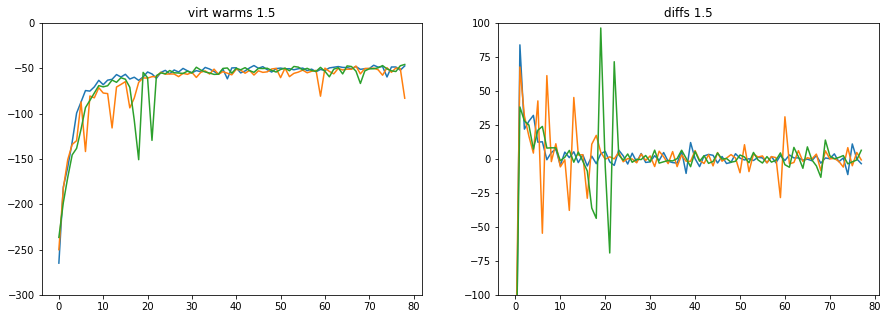

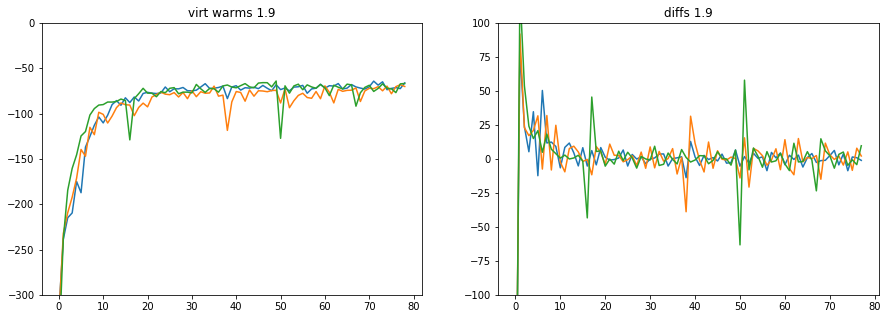

In [46]:
for vel in velocities:
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    for job in virt_warms[vel]:
        ax[0].plot(virt_warms[vel][job])
    ax[0].set_title(f"virt warms {vel}")
    ax[0].set_ylim(-300, 0)
    
    for job in virt_warms[vel]:
        diffs15 = [virt_warms[vel][job][i] - virt_warms[vel][job][i-1] 
                   for i in range(len(virt_warms[vel][job]) -1)]
        ax[1].plot(diffs15)
    ax[1].set_ylim(-100, 100)
    ax[1].set_title(f"diffs {vel}")
    plt.show()

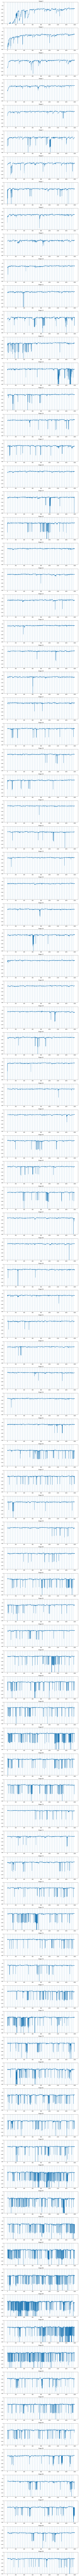

In [49]:
slbos[-1.9][539481][0]
plot_stages(slbos[-1.9][539481][0], 40, 40, ylim=(-300, 0))

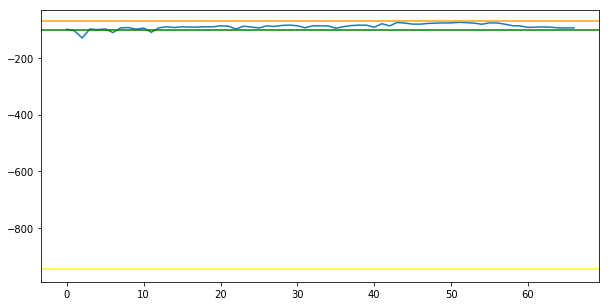

In [65]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(real_rewards[-1.9][565638])
ax.axhline(y=mins[-1.9], color="yellow", label="min")
ax.axhline(y=maxs[-1.9], color="orange", label="max")
ax.axhline(y=avgs[-1.9], color="green", label="avg")

In [ ]:
for vel in real_rewards:
    fig, ax = plt.subplots()
    ax.scatter([i for i in range(len(real_rewards[vel]))], real_rewards[vel], label=f"vel={vel}")
    ax.axhline(y=mins[vel], color="yellow")
    ax.axhline(y=maxs[vel], color="orange")
    ax.set_ylim((-200, 0))
    ax.axhline(y=avgs[vel], color="green")
    ax.legend()

In [ ]:
for i in range(1, 6):
    print(i)